# Plasma proteome profiling discovers novel proteins associated with non‐alcoholic fatty liver disease

#### *Lili Niu, Philipp E Geyer, Nicolai J Wewer Albrechtsen, Lise L Gluud, Alberto Santos, Sophia Doll, Peter V Treit, Jens J Holst, Filip K Knop, Tina Vilsbøll, Anders Junker, Stephan Sachs, Kerstin Stemmer, Timo D Müller, Matthias H Tschöp, Susanna M Hofmann, Matthias Mann*


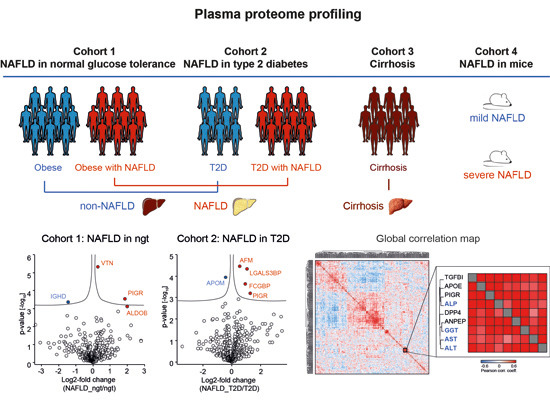

[Access article online](https://www.embopress.org/doi/full/10.15252/msb.20188793)

### Abstract

Non‐alcoholic fatty liver disease (NAFLD) affects 25% of the population and can progress to cirrhosis with limited treatment options. As the liver secretes most of the blood plasma proteins, liver disease may affect the plasma proteome. Plasma proteome profiling of 48 patients with and without cirrhosis or NAFLD revealed six statistically significantly changing proteins (ALDOB, APOM, LGALS3BP, PIGR, VTN, and AFM), two of which are already linked to liver disease. Polymeric immunoglobulin receptor (PIGR) was significantly elevated in both cohorts by 170% in NAFLD and 298% in cirrhosis and was further validated in mouse models. Furthermore, a global correlation map of clinical and proteomic data strongly associated DPP4, ANPEP, TGFBI, PIGR, and APOE with NAFLD and cirrhosis. The prominent diabetic drug target DPP4 is an aminopeptidase like ANPEP, ENPEP, and LAP3, all of which are up‐regulated in the human or mouse data. Furthermore, ANPEP and TGFBI have potential roles in extracellular matrix remodeling in fibrosis. Thus, plasma proteome profiling can identify potential biomarkers and drug targets in liver disease.


### Notebook

This notebook is a step by step guide on how to reproduce te analyses described in the Clinical Knowledge Graph article. The analyses described are performed in an automated manner following a sequence of steps defined in the configuration file (report_manager/config/proteomics.yml). Here, we use CKG's API to show this analytical workflow. 

In [1]:
import os
import pandas as pd

import ckg.ckg_utils as ckg_utils

from ckg.analytics_core.analytics import analytics
from ckg.analytics_core.viz import viz

from ckg.report_manager import project, knowledge
from ckg.report_manager.dataset import  ProteomicsDataset, ClinicalDataset

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
%matplotlib inline
init_notebook_mode(connected=True)

C:\Users\sande\.conda\envs\ckgenv\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
C:\Users\sande\.conda\envs\ckgenv\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.3.11.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


WGCNA functions will not work. Module Rpy2 not installed.
R functions will not work. Module Rpy2 not installed.


In [2]:
analysis_dir = '../../../../data/tmp/Niu2019'
ckg_utils.checkDirectory(analysis_dir)

## Load Data

This study is part of the datasets provided within CKG. The project data has already been loaded into CKG. The pipeline starts by building this project based on the types of datasets available (Clinical, Proteomic, etc.). We can access the data by creating a `project` object with the right project ifentifier and CKG will retrieve all the available data for us using the `query_data()` function.

In [3]:
p = project.Project(identifier="P0000001", datasets={}, knowledge=None, report={}, configuration_files={})
project_info = p.query_data()

In [4]:
project_info

{'attributes':   acronym           data_types description identifier  \
 0   NAFLD  proteomics|clinical        None   P0000014   
 
                                 name  number_subjects responsible status  
 0  Non-alcoholic fatty liver disease               48        test   None  ,
 'similarity':                              current current_id  \
 0  Non-alcoholic fatty liver disease   P0000014   
 1  Non-alcoholic fatty liver disease   P0000014   
 2  Non-alcoholic fatty liver disease   P0000014   
 3  Non-alcoholic fatty liver disease   P0000014   
 4  Non-alcoholic fatty liver disease   P0000014   
 5  Non-alcoholic fatty liver disease   P0000014   
 
                                          description              other  \
 0  The altered molecular proteins and pathways in...  Covid-19 - plasma   
 1                                               None           Melanoma   
 2                                               None        QUOD Kidney   
 3                             

Here, `project_info` contains all the information (attributes) for the chosen project: name, acronym, description, etc, as well as overlap and similarity with other projects in CKG's database. We save these attributes and project similarities in the `project` object `p`.

In [5]:
p.set_attributes(project_info)
p.get_similar_projects(project_info)
p.get_projects_overlap(project_info)

Now it is time to create a `dataset` object for each data type in the project and store them as a dictionary of datasets in `p`. We create the datasets without specifying any configuration. When CKG runs in an automated manner, the configuration files in `report_manager/config` define how each dataset is analysed and which parameters should be used by default. Here, we will run the analyses of the protoemics data step by step.

In [6]:
for data_type in p.data_types:
    dataset = None
    configuration = None
    if data_type == "proteomics":
        dataset = ProteomicsDataset(p.identifier, data={}, configuration=configuration, analysis_queries={}, report=None)
    elif data_type == "clinical":
        dataset = ClinicalDataset(p.identifier, data={}, configuration=configuration, analysis_queries={}, report=None)

    if dataset is not None:
        dataset.generate_dataset()
        p.update_dataset({data_type: dataset})

We can now see that our project `p` has two datasets - clinical and proteomics. These datasets will contain already serveral dataframes:
- original: data as it was collected/generated, with no processing done.

- processed: processed data after normalization, imputation, batch effect correction, etc.

- specific dataframes: depending on the type of data extra dataframes are generated, for instance, a list of clinical variables or annotation from Gene Ontology or other databases

In [7]:
p.list_datasets()

dict_keys(['proteomics', 'clinical'])

In [8]:
clinical_dataset = p.get_dataset('clinical')
clinical_dataset.list_dataframes()

['clinical variables', 'original', 'processed']

In [9]:
proteomics_dataset = p.get_dataset('proteomics')
proteomics_dataset.list_dataframes()

['number of proteins',
 'number of peptides',
 'number of modified proteins',
 'protein biomarkers',
 'tissue qcmarkers',
 'metadata',
 'protein pathway annotation',
 'protein go annotation',
 'original',
 'processed']

In [10]:
proteomics_dataset.get_dataframe('processed').head()

identifier,group,sample,subject,A2M~P01023,A30~A2MYE2,ABI3BP~Q7Z7G0,ACE~P12821,ACTB~P60709,ACTN1~P12814,ADA2~Q9NZK5,...,VCAM1~P19320,VCL~P18206,VH6DJ~A2N0T4,VIM~P08670,VK3~A2N2F4,VNN1~O95497,VTN~P04004,VWF~P04275,YWHAZ~P63104,scFv~Q65ZC9
0,Cirrhosis,69_F8,69,38.005564,28.173504,21.631230,22.251041,27.090330,25.039968,23.442151,...,26.016356,26.337731,31.159485,24.178889,25.835908,22.480055,32.815815,28.922779,22.347244,27.788928
1,Cirrhosis,70_F9,70,37.309118,27.981907,27.342062,23.847270,27.461155,25.896268,23.754503,...,27.343842,25.535996,31.994997,23.709777,25.004889,23.852908,32.722121,29.881279,22.141285,26.869972
2,Cirrhosis,71_F10,71,37.384952,28.857627,21.080035,22.863630,27.929764,24.295225,23.359443,...,26.353869,25.858635,30.139559,23.599064,26.271650,24.232132,32.755752,29.444625,21.972598,28.069328
3,Cirrhosis,72_F11,72,38.417225,28.978380,25.501910,22.992774,27.152479,25.231288,23.701340,...,26.959475,26.531017,31.977294,24.179076,25.929200,24.269047,32.714014,29.397176,22.216971,28.170209
4,Cirrhosis,73_F12,73,37.471303,28.748744,20.200498,21.326143,27.537048,22.392992,22.406264,...,26.473269,26.355535,30.485582,23.865224,26.701340,20.953141,32.722691,28.540895,18.630532,28.612280


## Processing of Proteomics Dataset

To show how to go from the original data to the processed dataframe, we will show what function is used and how the parameters are defined:

- df: long-format pandas dataframe with columns 'group', 'sample', 'subject', 'identifier' (protein), 'name' (gene) and 'LFQ_intensity'.

- index_cols: column labels to be be kept as index identifiers.

- drop_cols: column labels to be dropped from the dataframe.

- group: column label containing group identifiers.

- identifier: column label containing feature identifiers (i.e protein identifiers).

- extra_identifier: column label containing additional protein identifiers (e.g. gene names).

- filter_samples: if True filter samples with valid values below percentage (filter_samples_percent).

- filter_samples_percent: defines the maximum percentage of missing values allowed in a sample.

- imputation: if True performs imputation of missing values.

- imputation_method: method for missing values imputation ('KNN', 'distribuition', or 'mixed')

- missing_method: defines which expression rows are counted to determine if a column has enough valid values to survive the filtering process.

- missing_per_group: if True filter proteins based on valid values per group; if False filter across all samples.

- missing_max: maximum ratio of missing/valid values to be filtered.

- min_valid: minimum number of valid values to be filtered.

- value_col: column label containing expression values.

- shift: when using distribution imputation, the down-shift

- nstd: when using distribution imputation, the width of the distribution

- knn_cutoff: when using KNN imputation, the minimum percentage of valid values for which to use KNN imputation (i.e. 0.6 -> if 60% valid values use KNN, otherwise MinProb)

- normalize: whether or not to normalize the data

- normalization_method: method to be used to normalize the data ('median', 'quantile', 'linear', 'zscore', 'median_polish') (only with normalize=True)

- normalize_group: normalize per group or not (only with normalize=True)

- normalize_by: whether the normalization should be done by 'features' (columns) or 'samples' (rows) (only with normalize=True)

In [11]:
original_data = proteomics_dataset.get_dataframe('original')
original_data.head()

,LFQ_intensity,batch,group,identifier,name,sample,subject
0,21.593090,None,NAFLD+T2DM,M0R009,A1BG,63_F2,63
1,37.316049,None,Cirrhosis,P01023,A2M,77_G4,77
2,37.309118,None,Cirrhosis,P01023,A2M,70_F9,70
3,38.005564,None,Cirrhosis,P01023,A2M,69_F8,69
4,37.957887,None,Cirrhosis,P01023,A2M,76_G3,76


In [12]:
processed_data = analytics.get_proteomics_measurements_ready(df=original_data, index_cols=['subject', 'sample', 'group'], 
                                                             imputation=True,
                                                             imputation_method="distribution", missing_method="percentage",
                                                             extra_identifier="name",
                                                             filter_samples=False,
                                                             missing_per_group=True, missing_max=0.3,
                                                             shift=1.8, nstd=0.3,
                                                             value_col='LFQ_intensity')

In [13]:
processed_data.head()

identifier,subject,sample,group,A2M~P01023,A30~A2MYE2,ABI3BP~Q7Z7G0,ACE~P12821,ACTB~P60709,ACTN1~P12814,ADA2~Q9NZK5,...,VCAM1~P19320,VCL~P18206,VH6DJ~A2N0T4,VIM~P08670,VK3~A2N2F4,VNN1~O95497,VTN~P04004,VWF~P04275,YWHAZ~P63104,scFv~Q65ZC9
0,31,31_C6,Healthy,37.172267,27.313458,25.233156,21.729536,27.979074,24.172188,23.070420,...,25.636164,26.854242,31.263381,24.123099,26.241109,23.096500,32.661954,27.711616,21.272205,28.179259
1,32,32_C7,Healthy,36.897240,28.550101,25.251670,20.671384,26.688458,24.518693,23.557155,...,25.364461,26.409456,31.127802,24.090713,25.906809,23.449222,32.627384,28.778689,22.492604,29.175028
2,33,33_C8,Healthy,37.253761,28.393359,24.360115,19.435843,27.327060,24.788959,22.813820,...,25.679386,27.330393,30.133080,23.291947,26.596194,22.319916,32.676529,28.839721,22.297905,28.177502
3,34,34_C9,Healthy,37.101435,27.986905,25.613204,22.740147,27.323972,24.928996,20.730150,...,25.824324,26.238760,30.460023,23.684959,25.682791,23.034923,32.625970,28.588816,22.040461,28.077144
4,35,35_C10,Healthy,37.169563,28.806458,26.438967,23.431104,26.683380,25.832032,22.667416,...,26.109427,26.766229,30.174624,24.099296,27.743296,24.107891,32.652091,28.482200,22.173561,28.387800


## Generate Report

Once the data for all the different data types has been loaded we can proceed with the statistical analysis and visualization of the results. This is what we define in CKG as generating a Report for each dataset.

To generate these reports, we make use of the functionality in the analytics core. The automated analysis uses the `generate_report()` function, which uses the configuration in `report_manager/config` to run the sequence of analysis defined for each dataset (clinical, proteomics). The code would be something like this:

```python
project_report = p.generate_project_info_report()
p.update_report({"Project information": project_report})
for dataset_type in p.data_types:
    dataset = p.get_dataset(dataset_type)
    if dataset is not None:
        dataset.generate_report()
```

We will however run some of the analyses to showcase how these steps are done and can be easily modified using the available parameters.

### Principal Component Analysis (PCA)

In [14]:
pca_result, args = analytics.run_pca(processed_data, drop_cols=['sample', 'subject'], group='group')

In [15]:
args.update({"loadings":15, "title":'PCA plot groups', 'height':600, 'width':700, 'factor':15})
plot = viz.get_pca_plot(pca_result, identifier='pca', args=args)
iplot(plot.figure)

### Functional PCA - single sample Gene Set Enrichment Analysis (ssGSEA)

We will use the Gene Ontology annotations already extracted when creating the proteomics dataset (dataframe: `protein go annotation`).

In [16]:
annotation = proteomics_dataset.get_dataframe('protein go annotation')
annotation.head()

,annotation,identifier,source
0,mitochondrial genome maintenance,TYMP~P19971,UniProt
1,maltose metabolic process,MGAM~O43451,UniProt
2,maltose metabolic process,GAA~P10253,UniProt
3,ribosomal large subunit assembly,RPL11~P62913,UniProt
4,ribosomal large subunit assembly,RPLP0~P05388,UniProt


In [17]:
ssgsea_result = analytics.run_ssgsea(data=processed_data, annotation=annotation, annotation_col='annotation',
                                     identifier_col='identifier', set_index=['group', 'sample','subject'],
                                     outdir=None, min_size=10, scale=False, permutations=0)

In [18]:
pca_result, args = analytics.run_pca(data=ssgsea_result['nes'], drop_cols=['sample', 'subject'], group='group')

In [19]:
args.update({"loadings":15, "title":'Functional PCA plot groups', 'height':600, 'width':700, 'factor':0.3})
plot = viz.get_pca_plot(data=pca_result, identifier='pca', args=args)
iplot(plot.figure)

### Differential Regulation

In [20]:
anova_result = analytics.run_anova(df=processed_data, alpha=0.05,
                                   drop_cols=['sample', 'subject'], subject='subject',
                                   group='group', correction='fdr_bh', is_logged=True)

In [21]:
anova_result.head()

,identifier,group1,group2,mean(group1),std(group1),mean(group2),std(group2),posthoc Paired,posthoc Parametric,posthoc T-Statistics,...,FC,efftype,F-statistics,pvalue,padj,correction,rejected,-log10 pvalue,Method,posthoc padj
0,A2M~P01023,Cirrhosis,Healthy,37.813581,0.412603,37.119625,0.227292,False,True,4.658543,...,1.617713,hedges,5.019891,0.002073,0.037675,FDR correction BH,True,3.709005,One-way anova,0.016579
1,A2M~P01023,Cirrhosis,NAFLD+NGT,37.813581,0.412603,37.141632,0.263616,False,True,4.339807,...,1.593223,hedges,5.019891,0.002073,0.037675,FDR correction BH,True,3.403735,One-way anova,0.025276
2,A2M~P01023,Cirrhosis,NAFLD+T2DM,37.813581,0.412603,37.435432,0.592818,False,True,1.655627,...,1.299673,hedges,5.019891,0.002073,0.037675,FDR correction BH,True,0.938823,One-way anova,0.444088
3,A2M~P01023,Cirrhosis,T2DM,37.813581,0.412603,37.280256,0.398108,False,True,2.778815,...,1.447261,hedges,5.019891,0.002073,0.037675,FDR correction BH,True,1.860078,One-way anova,0.112973
4,A2M~P01023,Healthy,NAFLD+NGT,37.119625,0.227292,37.141632,0.263616,False,True,-0.199939,...,0.984861,hedges,5.019891,0.002073,0.037675,FDR correction BH,True,0.073776,One-way anova,0.972450


In [22]:
args={'alpha':0.05, 
      'fc':2, 
      'colorscale':'Blues', 
      'showscale': False,
      'marker_size':10,
      'num_annotations':480,
      'x_title':'log2FC', 
      'y_title':'-log10(pvalue)'}
figures = viz.run_volcano(anova_result, identifier='volcano', args=args)
for figure in figures:
    iplot(figure.figure)

## Correlation Analysis

In [23]:
correlation_result = analytics.run_correlation(processed_data, alpha=0.05,
                                               subject='subject', group='group',
                                               method='spearman', correction='fdr_bh')

In [24]:
correlation_result.head()

,node1,node2,weight,pvalue,padj,rejected
1,A30~A2MYE2,A2M~P01023,0.314264,0.0,0.0,True
4,ABI3BP~Q7Z7G0,A30~A2MYE2,-0.332827,0.0,0.0,True
8,ACE~P12821,ABI3BP~Q7Z7G0,0.056882,0.0,0.0,True
10,ACTB~P60709,A2M~P01023,-0.033977,0.0,0.0,True
11,ACTB~P60709,A30~A2MYE2,-0.104429,0.00242,0.0057,True


In [37]:
network = viz.get_network(correlation_result, identifier="Correlation network", 
                         args={'source':'node1', 'target':'node2', 
                               'title':'Correlation network', 'values':'weight',
                               'cutoff':0.5, 'cutoff_abs':True, 'color_weight': True,
                               'communities_algorithm': 'louvain'})

In [38]:
viz.visualize_notebook_network(network['notebook'], notebook_type='jupyter', layout={})

Cytoscape(data={'elements': [{'data': {'degree': 2, 'radius': 2, 'color': '#1acf66', 'cluster': 0, 'id': 'APOC…

### Functional Enrichment

In [27]:
enrichment = analytics.run_up_down_regulation_enrichment(anova_result, annotation,
                                                         identifier='identifier', groups=['group1', 'group2'],
                                                         annotation_col='annotation', reject_col='rejected',
                                                         group_col='group', method='fisher',
                                                         correction='fdr_bh', alpha=0.05, lfc_cutoff=1)

C:\Users\sande\.conda\envs\ckgenv\lib\site-packages\pandas\core\frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [28]:
figures = viz.get_enrichment_plots(enrichment, identifier='enrichment', args={'width':2200})
for fig in figures:
    iplot(fig.figure)

## Knowledge from CKG

An option to retrieve relevant knowledge in CKG for the list of significant hits would be to use the functionality `annotate_list()`, which extracts information from the knowledge graph related to the provided list of proteins (and other entities as well). This result is mildly different results to the automatically generated knowledge report, which also includes results from the analysis of the clinical variables as well as results from the combination of both datasets.

For this, we need to create a `Knowledge` object and provide the list of proteins we are interested in. Further, the function gives the posibility to provide a list of diseases relevant to the study.

In [29]:
kn = knowledge.Knowledge(identifier='NFLD', data=None)

In [30]:
sig_hits = list(set(anova_result.loc[anova_result.rejected, "identifier"]))
print(sig_hits)

['HBG2~P69892', 'LGALS3BP~Q08380', 'ALDOB~P05062', 'APOM~O95445', 'PIGR~P01833', 'VTN~P04004', 'TTR~P02766', 'QSOX1~O00391', 'None~A8K1K1', 'PROC~P04070', 'A2M~P01023', 'IGHM~P01871', 'RBP4~P02753', 'LYVE1~Q9Y5Y7', 'ITIH1~P19827', 'V2-13~Q5NV73', 'C1QB~P02746', 'CPN2~P22792', 'IGFBP3~P17936', 'None~A0A120HG46', 'AFM~P43652', 'JCHAIN~P01591', 'ALDH1A1~P00352', 'CLU~P10909', 'VCAM1~P19320', 'IGH@~Q6GMX6', 'COLEC11~Q9BWP8', 'C3~P01024', 'IGFALS~P35858', 'SHBG~P04278', 'GP1BA~P07359', 'CPB2~Q96IY4', 'C6~P13671', 'C7~P10643', 'IGHV5-51~A0A0C4DH38', 'TGFBI~Q15582']


In [31]:
kn.annotate_list(query_list=sig_hits,
                 entity_type='protein',
                 queries_file=None,
                 attribute=None,
                 diseases=['cirrhosis', 'non-alcoholic fatty liver disease', 'type 2 diabetes mellitus'],
                 entities=None)

In [32]:
kn.graph

In [33]:
kn.generate_report(visualizations=['network'], # how to visualize the results (network, sankey) 
                   summarize=True, # Whether or not to summarize the annotation
                   method='pagerank', # Method for summarizing the annotation (betweenness, closeness, pagerank)
                   inplace=True) # If True, the summarized graph is saved, otherwise keep full graph

In [34]:
kn.report.visualize_report(environment='notebook')[0]

Cytoscape(data={'elements': [{'data': {'type': 'Protein', 'color': '#756bb1', 'centrality': 0.0001516464174675…